# **Flight Delay Time Prediction**

Target -> arr_del , regression done to predict the time 

In [11]:
#reading the flight delay csv file
import pandas as pd
df=pd.read_csv('Airline_Delay_Cause.csv')
print(df.shape)
df.head()

(171666, 21)


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [12]:
print(df.columns)
print(df.dtypes)
df.describe()

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')
year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_de

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


In [13]:
#dropped columns
#redundant:
''' carrier and airport name are same as carrier and airport columns
    both ct (count) and delay columns have the same function
'''
#derived- arr_del15 (already have a delay column which we are predicting)
#Feature engineering addin new features
#total delay count 
df['total_delay_ct'] = (df['carrier_ct'] +df['weather_ct'] +df['nas_ct'] +df['security_ct'] +df['late_aircraft_ct'])
drop_cols={'carrier_name','airport_name','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'}

df.drop(drop_cols,axis=1,inplace=True)

In [14]:
#finding null values
print(df.isnull().sum())

year                     0
month                    0
carrier                  0
airport                  0
arr_flights            240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
total_delay_ct         240
dtype: int64


In [15]:
#drop as target col cant have null
df = df.dropna(subset=['arr_delay'])
#filling flights with median
df['arr_flights'] = df['arr_flights'].fillna(df['arr_flights'].median())
#filling remaining with 0s
df = df.fillna(0)

In [16]:
#showing obj datatypes to be encoded
df.select_dtypes(include='object').nunique()

carrier     21
airport    391
dtype: int64

In [17]:
#encoding:
#one-hot encoding carrier as small, frequency encoding airport
df = pd.get_dummies(df,columns=['carrier'])

airport_freq=df['airport'].value_counts().to_dict()
df['airport']=df['airport'].map(airport_freq)


In [18]:
#splitting without target value
X = df.drop('arr_delay', axis=1)
y = df['arr_delay']

In [9]:
#splitting into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [10]:
#random forest model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=30)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
preds = rf.predict(X_test)
print("MAE:",mean_absolute_error(y_test, preds))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds)))
print("R² Score:",r2_score(y_test, preds))


MAE: 111.21896138365516
RMSE: 626.300665739837
R² Score: 0.997497824930275


In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test,preds,alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

NameError: name 'preds' is not defined

<Figure size 800x600 with 0 Axes>

In [22]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

NameError: name 'plt' is not defined

In [14]:
#for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
l_preds = lr.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, l_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, l_preds)))
print("R² Score:", r2_score(y_test, l_preds))


MAE: 0.01416410530489539
RMSE: 1.0478626350498115
R² Score: 0.9999999929957659


In [19]:
#linear reggression shows leakage, delay columns and very related in heatmap
drop_cols = ['arr_cancelled','arr_diverted','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','total_delay_ct']
df.drop(drop_cols,axis=1,inplace=True)

In [16]:
#redoing
X = df.drop('arr_delay', axis=1)
y = df['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
l_preds = lr.predict(X_test_scaled)
print("MAE:", mean_absolute_error(y_test, l_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, l_preds)))
print("R² Score:", r2_score(y_test, l_preds))

MAE: 1970.9948668043733
RMSE: 5712.779583126941
R² Score: 0.7918162237662738


In [17]:
rf2= RandomForestRegressor(random_state=30)
rf2.fit(X_train, y_train)
preds2= rf2.predict(X_test)

In [18]:
print("MAE:",mean_absolute_error(y_test, preds2))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds2)))
print("R² Score:",r2_score(y_test, preds2))

MAE: 1132.235817409268
RMSE: 3711.5892953272614
R² Score: 0.9121236979380744


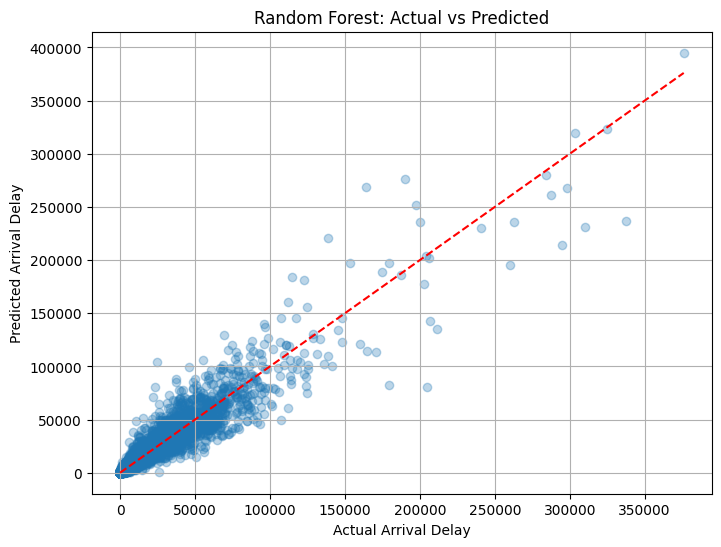

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,preds2,alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

25


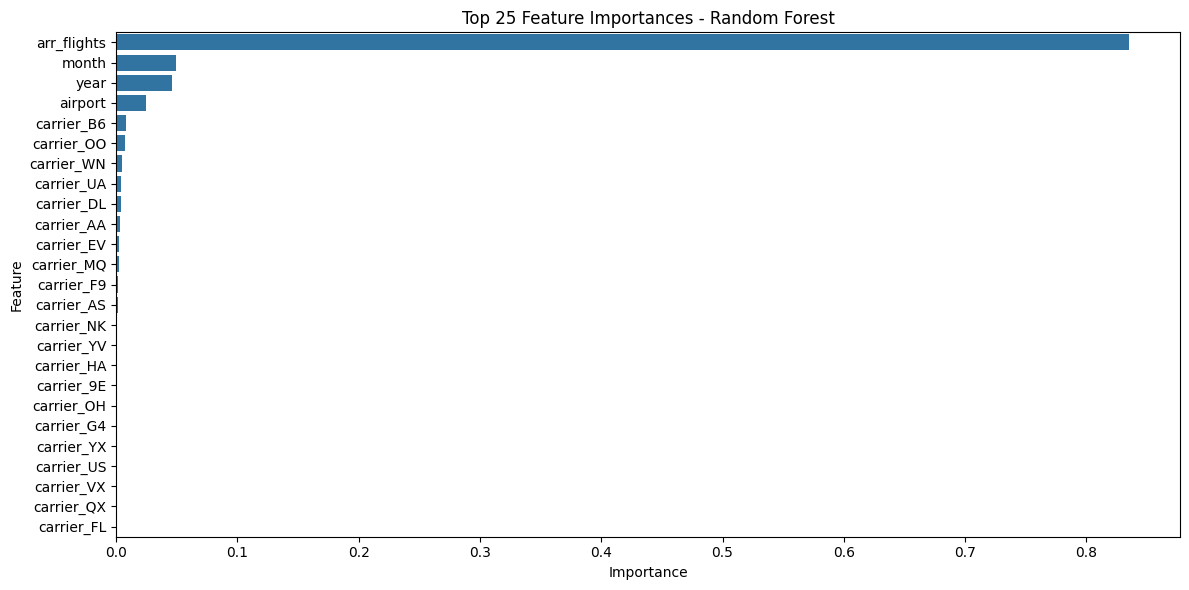

In [20]:
#importances plot
importances = rf2.feature_importances_
print(len(importances))
features = np.array(X_train.columns) 
sorted_idx = np.argsort(importances)[::-1]  
top_n = min(25, len(importances))
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[sorted_idx][:top_n], y=features[sorted_idx][:top_n])
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [21]:
#check for overfitting
from sklearn.metrics import r2_score
train_preds = rf2.predict(X_train)
print("Train R²:",r2_score(y_train, train_preds))
print("Test R²:",r2_score(y_test,pred2))
#close enough, very slight overfitting


Train R²: 0.9863377720761608
Test R²: 0.9121236979380744


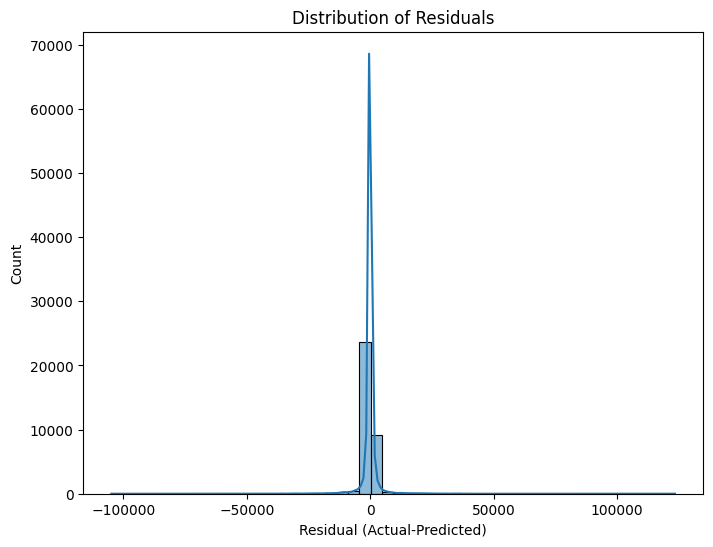

In [22]:
#residual plot
residuals = y_test-pred2
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50,kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual-Predicted)")
plt.ylabel("Count")
plt.show()


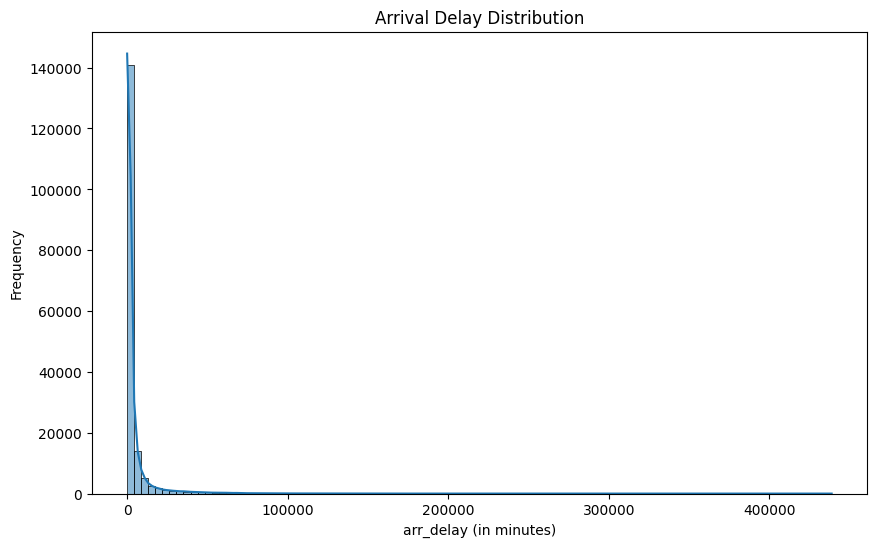

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['arr_delay'], bins=100, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('arr_delay (in minutes)')
plt.ylabel('Frequency')
plt.show()


Before: (171426, 26)
After: (150309, 26)


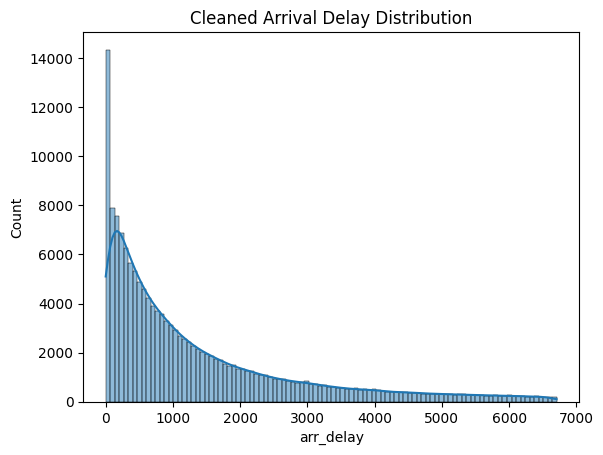

In [30]:
#cleaning outliers
Q1 = df['arr_delay'].quantile(0.25)
Q3 = df['arr_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['arr_delay'] >= lower_bound) & (df['arr_delay'] <= upper_bound)]
print("Before:", df.shape)
print("After:", df_clean.shape)
sns.histplot(df_clean['arr_delay'], bins=100, kde=True)
plt.title('Cleaned Arrival Delay Distribution')
plt.show()


In [34]:
X = df.drop('arr_delay', axis=1)
y = df['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
rf2= RandomForestRegressor(random_state=30)
rf2.fit(X_train, y_train)
preds2= rf2.predict(X_test)

In [35]:
print("MAE:",mean_absolute_error(y_test, preds2))
print("RMSE:",np.sqrt(mean_squared_error(y_test, preds2)))
print("R² Score:",r2_score(y_test, preds2))

MAE: 1132.235817409268
RMSE: 3711.5892953272614
R² Score: 0.9121236979380744


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test,preds2,alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()

# Summary:

## Processing:
* basic eda done
* dropped redundant values 'carrier_name' and 'airport_name'
* dropping count, and later delay columns to avoid leakage
* dropped target column's 'arr_del' null vaues
* replaced 'arr_flights' null values with median values
* replaced the rest with 0s
* one-hot encoded 'carrier', frequency encoded 'airport'

## Model:
* Used Random Forest
* while using heatmap and linear regression, possible leakage from highly correlated delay was assumed
* once values were dropped random forest and linear regression were done again
* Actual values vs Predicted plot, residual plot and top feature importances were plotted
* Overfitting was checked
  
* Final metrics
|MAE|RMSE|R² Score|
|---|----|-----|
|1132.235817409268|3711.5892953272614|0.9121236979380744|

* Random Forest gave the best generalization performance on the test set with strong R² and lower error values.
  
* Linear Regression was highly sensitive to data leakage before preprocessing but performed poorly after cleaning.
  
* Random Forest Worked better because it
    * Captures Non-linearity
    * Handles Feature Interactions
    * Robust to Noise & Missing Data
    * Requires no Scaling


  
* Limitations
    * Slight Overfitting: Train R² (0.997) is higher than Test R² (0.912), but still within acceptable range.
    * Memory Usage: Random Forest is more memory-intensive than linear regression, especially with large datasets and many trees.
    * RF is a little less interpretable than linear models 